### Load MDAnalysis with its RDF tool, and plotting library matplotlib

In [1]:
import MDAnalysis
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt

ImportError: No module named MDAnalysis

### Adjust the filepaths to use your own .gro and .xtc

In [11]:
# load the initial coordinates .gro + the simulation data .xtc
# the .gro file also contains the names of the names of the molecules and atoms 
# the .xtc file is compressed, and does not store any initial coordinates itself (only the changes in x/y/z for each frame)
u = MDAnalysis.Universe('lab2/popc_c12_h2o/md.gro', 'lab2/popc_c12_h2o/md.xtc')

In [3]:
# select water
water_beads = u.select_atoms('resname W')

# how does MDAnalysis know what we mean by W? Scan through the .gro file to find out

In [ ]:
# how many water beads did we select? does this seem correct?
water_beads

### select the headgroup PO4 atom in the lipids POPC

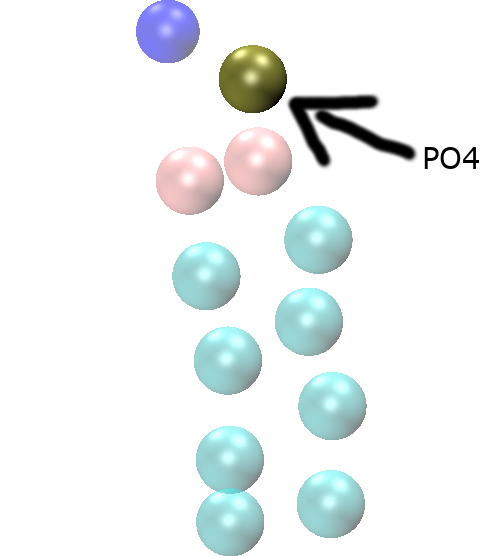

In [5]:
# the picture below shows a single phospholipid POPC

In [ ]:
# select all PO4 atoms from phospholipids POPC
popc_headgroup = u.select_atoms('resname POPC and name PO4')

popc_headgroup

### What is RDF? 

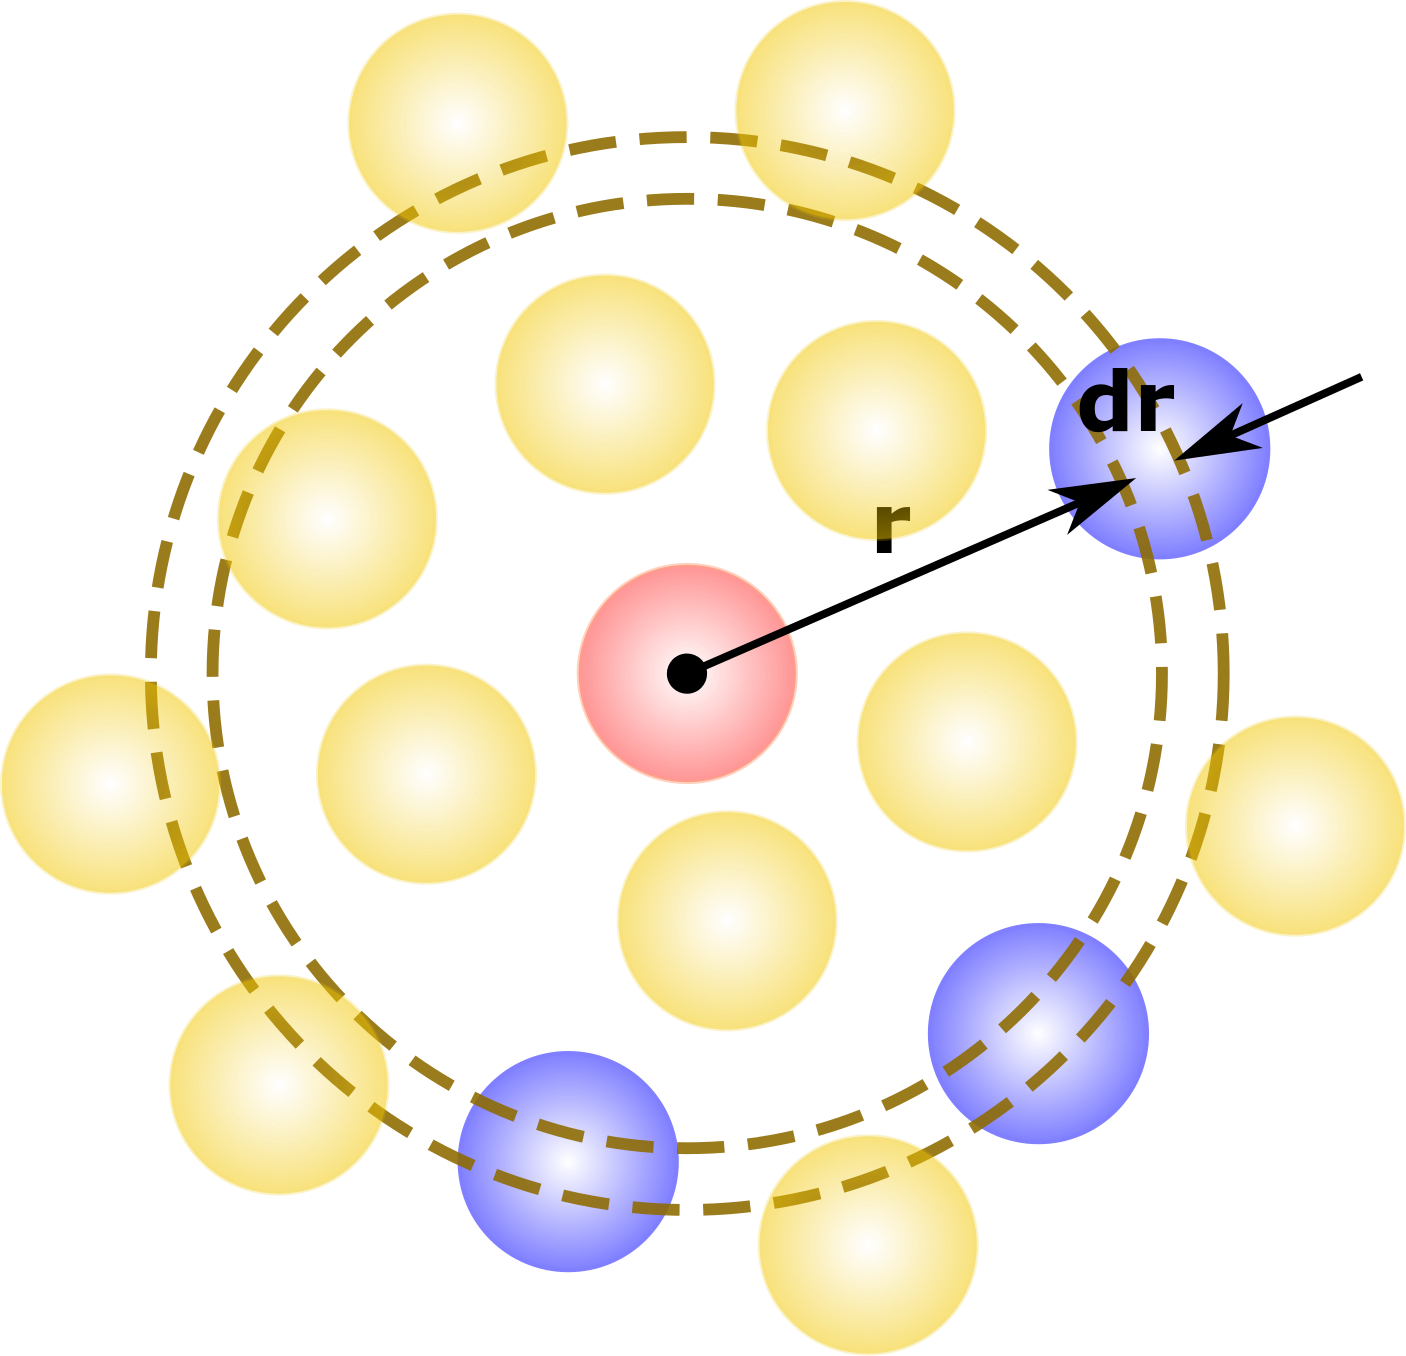

In [7]:
# "how density varies as a function of distance from a reference particle" - https://en.wikipedia.org/wiki/Radial_distribution_function

In [ ]:
# compute the radial distribution function, 
# use distances between 0 and 30A
rdf = InterRDF(popc_headgroup, water_beads, range=(0.0, 30.0))
rdf.run()

# plot the data
plt.plot(rdf.bins, rdf.rdf)
plt.show()

### How does the calculated RDF compare to the gromacs RDF?

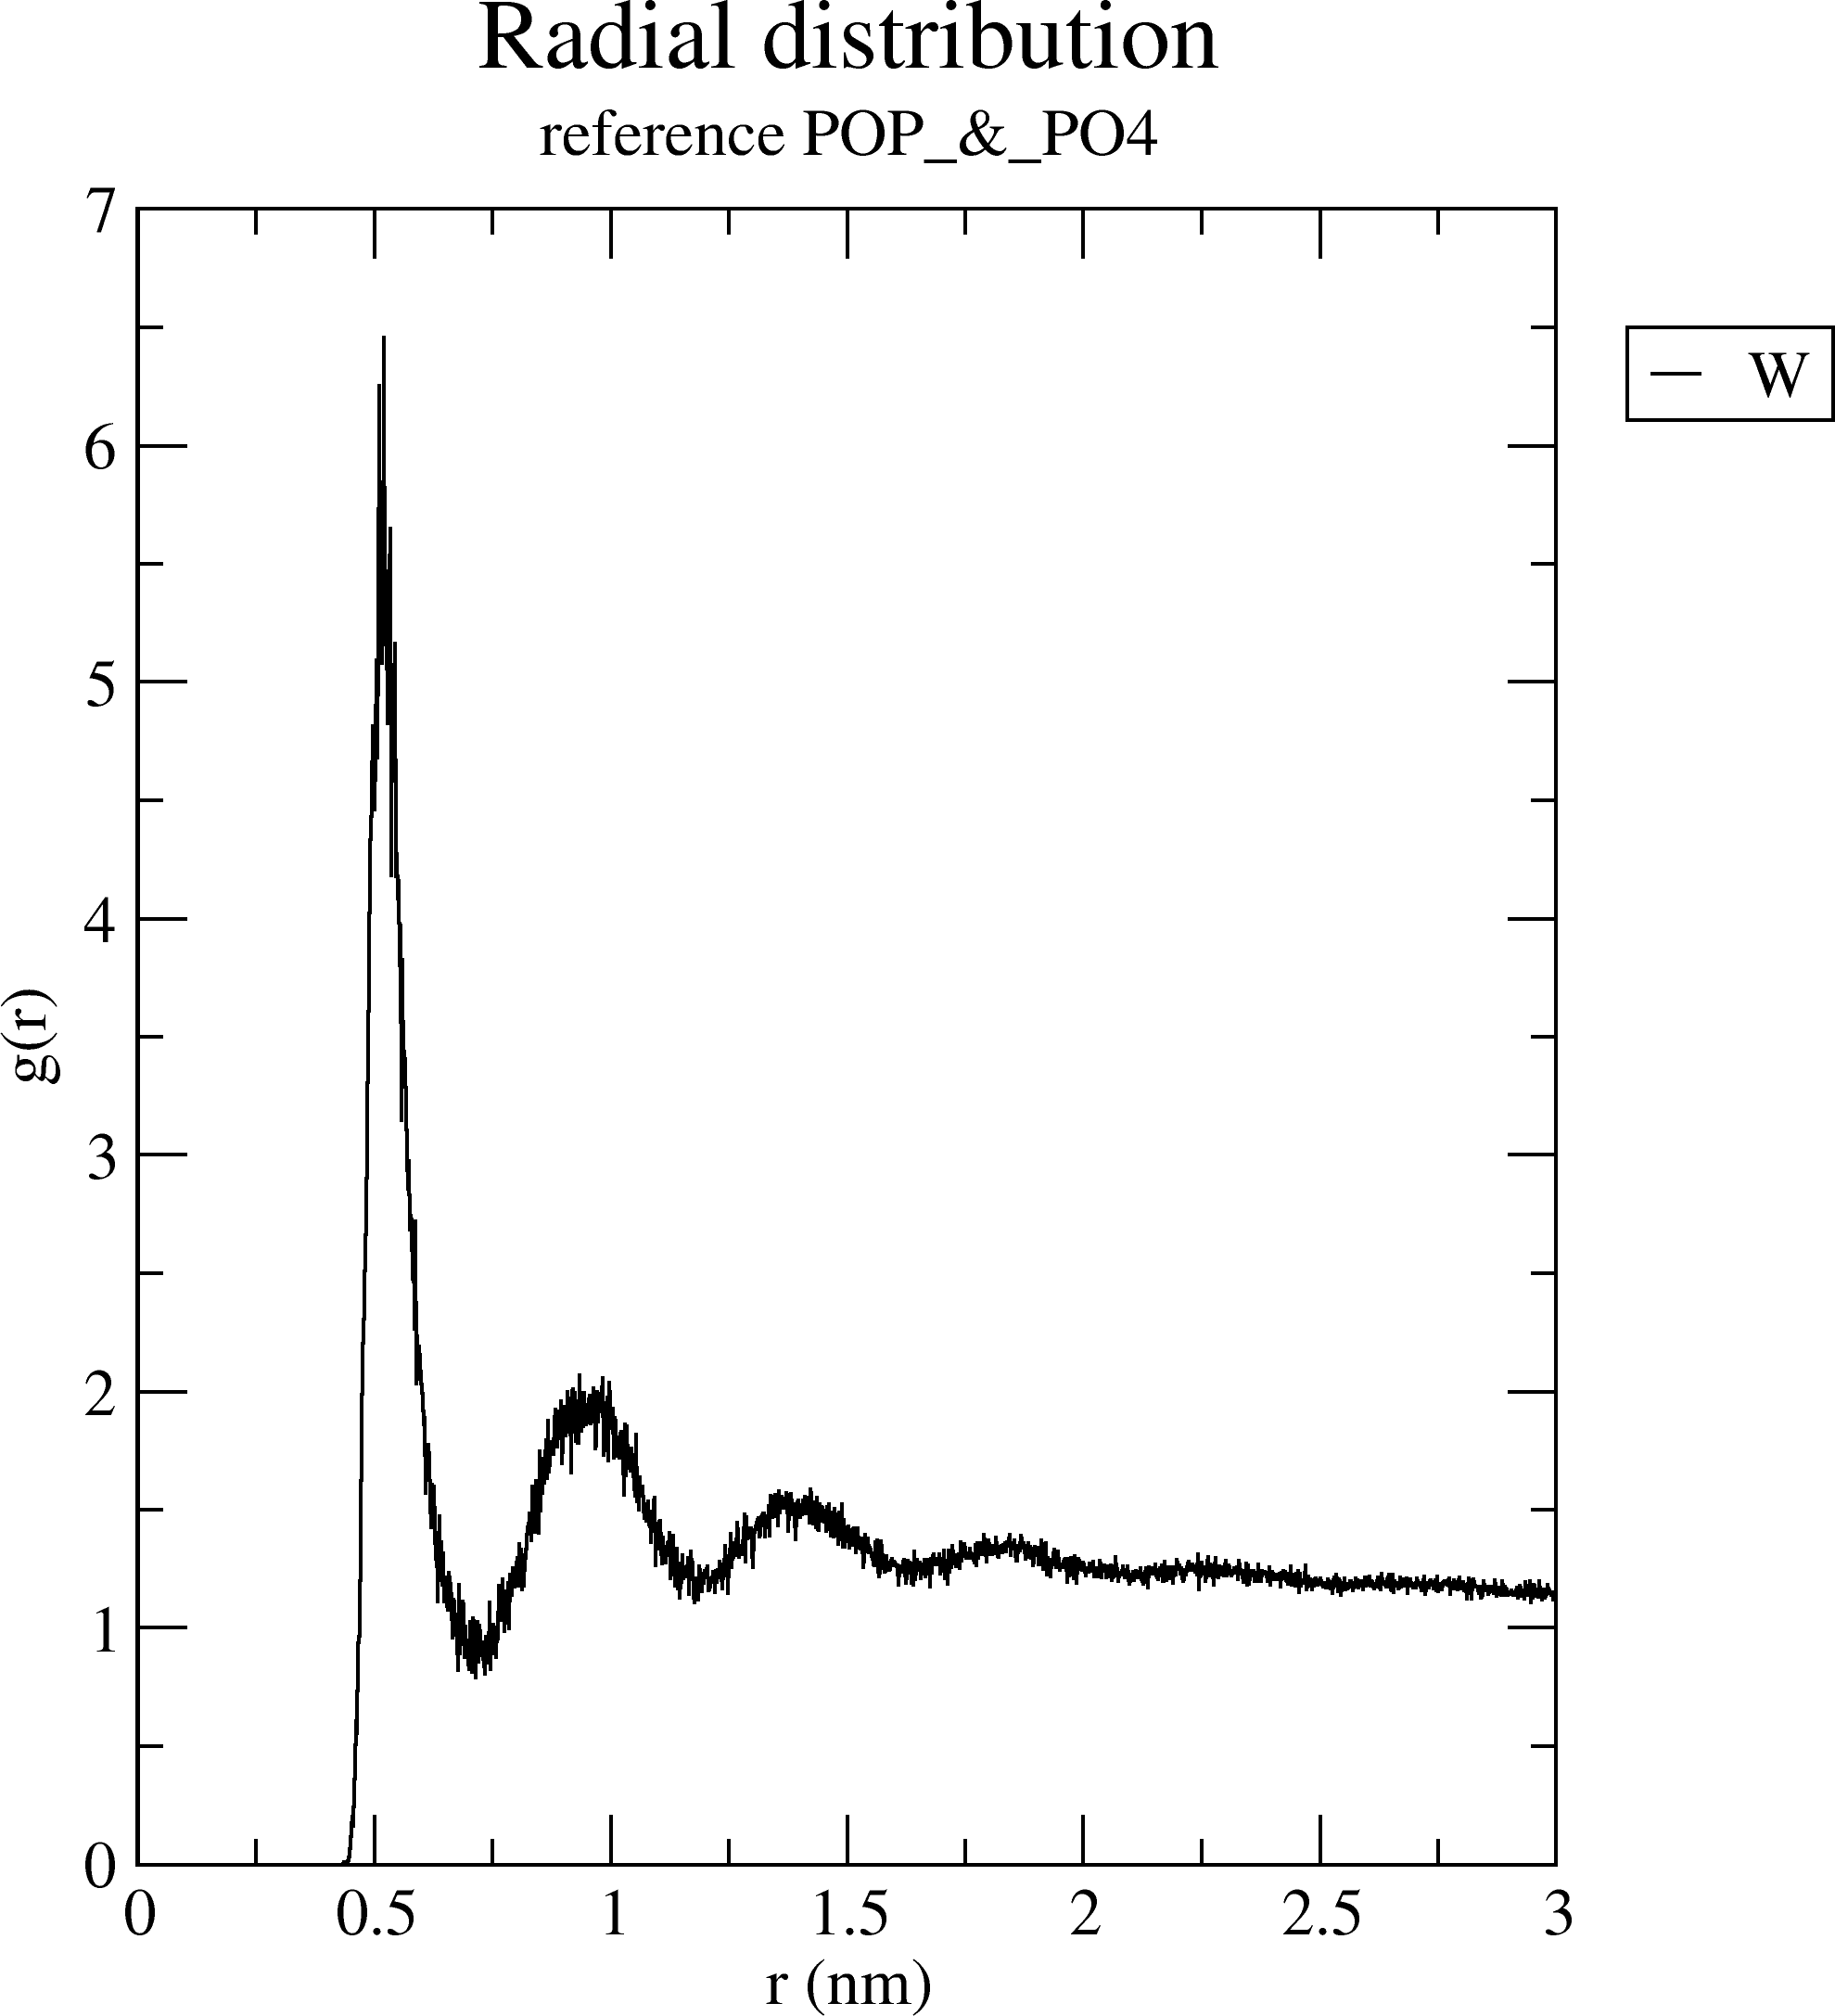

In [9]:
Image(filename="lab2/popc_c12_h2o/rdf_popcPo4_to_W_gromacsrdf.png", width=500)

In [10]:
# Can you control how large the bin size is in the RDF? 
# How is the InterRDF function implemented?
# with ipython, you can add a single or double after the function to get the documentation and the code, respectively
InterRDF?